# AIRLINE CUSTOMER SEGMENTATION

Dataset Description

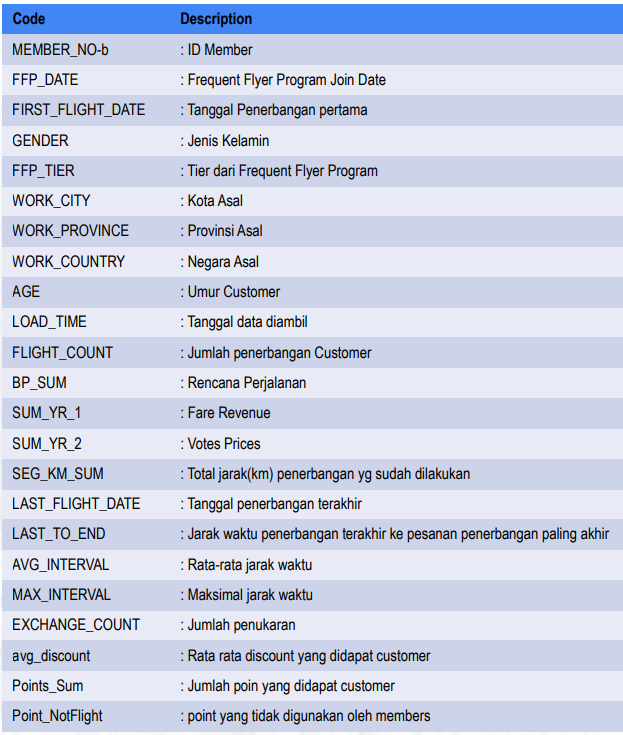

## IMPORT PACKAGE

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Package imports
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.23.5
pandas version :  1.5.3
seaborn version :  0.13.1


## LOAD DATA

In [ ]:
url ='https://raw.githubusercontent.com/mirraafifah/Airline-Customer/main/flight.csv'

In [ ]:
df = pd.read_csv(url)

In [ ]:
df.head()

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,11/2/2006,12/24/2008,Male,6,.,beijing,CN,31.0,3/31/2014,...,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
1,28065,2/19/2007,8/3/2007,Male,6,NaN,beijing,CN,42.0,3/31/2014,...,167434.0,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33
2,55106,2/1/2007,8/30/2007,Male,6,.,beijing,CN,40.0,3/31/2014,...,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26
3,21189,8/22/2008,8/23/2008,Male,5,Los Angeles,CA,US,64.0,3/31/2014,...,125500.0,281336,12/26/2013,97,27.863636,73,11,1.090870,372204,12
4,39546,4/10/2009,4/15/2009,Male,6,guiyang,guizhou,CN,48.0,3/31/2014,...,130702.0,309928,3/27/2014,5,4.788079,47,27,0.970658,338813,39


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.duplicated(subset='MEMBER_NO').sum()

0

In [ ]:
df.isna().sum()

MEMBER_NO               0
FFP_DATE                0
FIRST_FLIGHT_DATE       0
GENDER                  3
FFP_TIER                0
WORK_CITY            2269
WORK_PROVINCE        3248
WORK_COUNTRY           26
AGE                   420
LOAD_TIME               0
FLIGHT_COUNT            0
BP_SUM                  0
SUM_YR_1              551
SUM_YR_2              138
SEG_KM_SUM              0
LAST_FLIGHT_DATE        0
LAST_TO_END             0
AVG_INTERVAL            0
MAX_INTERVAL            0
EXCHANGE_COUNT          0
avg_discount            0
Points_Sum              0
Point_NotFlight         0
dtype: int64

In [ ]:
df['AGE'] = df['AGE'].fillna(df['AGE'].median())
df['SUM_YR_1'] = df['SUM_YR_1'].fillna(df['SUM_YR_1'].median())
df['SUM_YR_2'] = df['SUM_YR_2'].fillna(df['SUM_YR_2'].median())

In [ ]:
nums= ['MEMBER_NO','FFP_TIER','AGE','FLIGHT_COUNT','BP_SUM','SUM_YR_1','SUM_YR_2','SEG_KM_SUM','LAST_TO_END','AVG_INTERVAL','MAX_INTERVAL','EXCHANGE_COUNT','avg_discount','Points_Sum','Point_NotFlight']
cats= ['FFP_DATE','FIRST_FLIGHT_DATE','GENDER','WORK_CITY','WORK_PROVINCE','WORK_COUNTRY','LOAD_TIME','LAST_FLIGHT_DATE']

In [ ]:
df[nums].describe()

,MEMBER_NO,FFP_TIER,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
count,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.0000,62988.000000
mean,31494.500000,4.102162,42.466502,11.839414,10925.081254,5333.022406,5597.823538,17123.878691,176.120102,67.749788,166.033895,0.319775,0.721558,12545.7771,2.728155
std,18183.213715,0.373856,9.853632,14.049471,16339.486151,8077.407958,8694.832417,20960.844623,183.822223,77.517866,123.397180,1.136004,0.185427,20507.8167,7.364164
min,1.000000,4.000000,6.000000,2.000000,0.000000,0.000000,0.000000,368.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
25%,15747.750000,4.000000,35.000000,3.000000,2518.000000,1020.000000,785.000000,4747.000000,29.000000,23.370370,79.000000,0.000000,0.611997,2775.0000,0.000000
50%,31494.500000,4.000000,41.000000,7.000000,5700.000000,2800.000000,2773.000000,9994.000000,108.000000,44.666667,143.000000,0.000000,0.711856,6328.5000,0.000000
75%,47241.250000,4.000000,48.000000,15.000000,12831.000000,6524.250000,6826.250000,21271.250000,268.000000,82.000000,228.000000,0.000000,0.809476,14302.5000,1.000000
max,62988.000000,6.000000,110.000000,213.000000,505308.000000,239560.000000,234188.000000,580717.000000,731.000000,728.000000,728.000000,46.000000,1.500000,985572.0000,140.000000


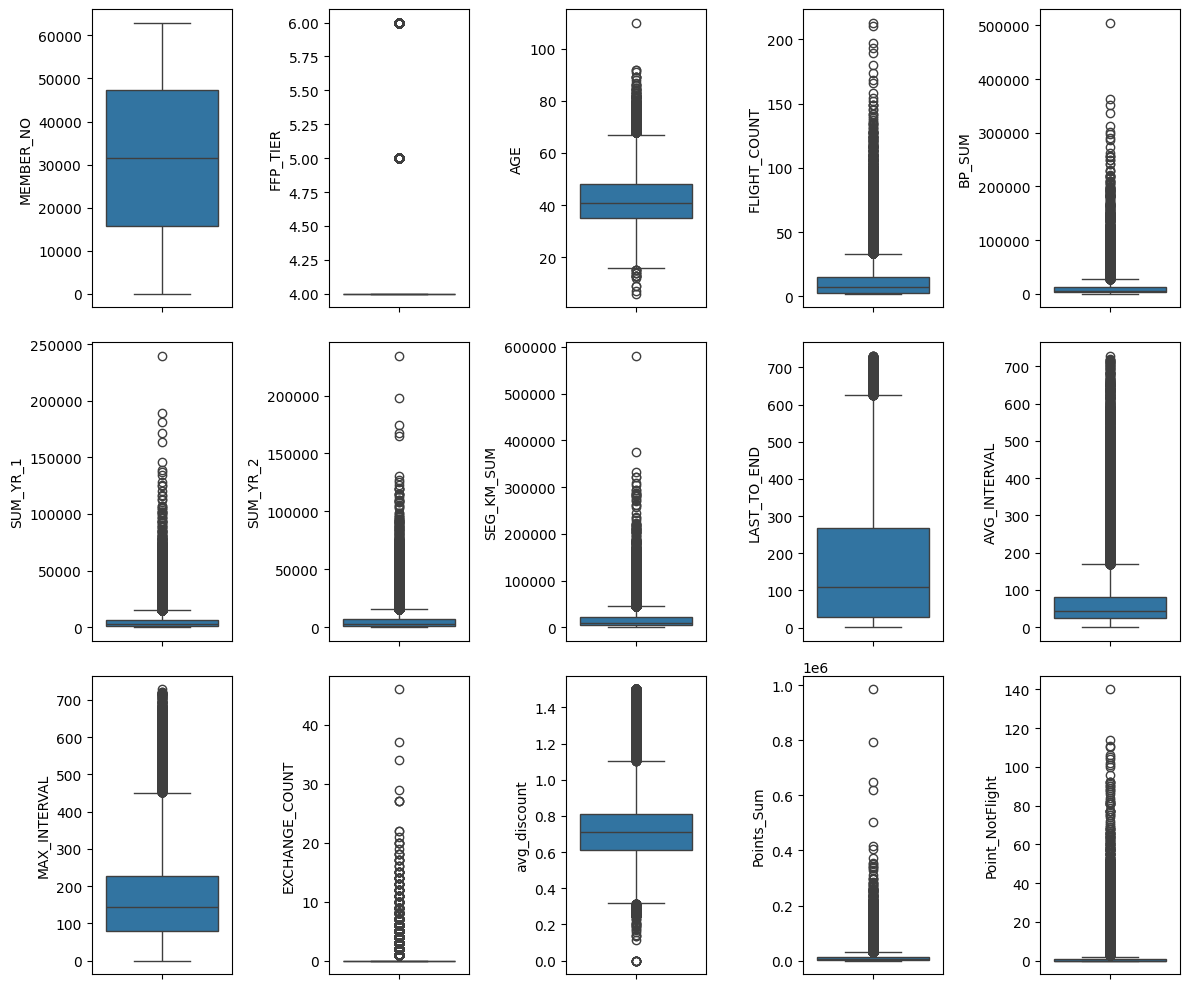

In [ ]:
plt.figure(figsize = (12,10))
for i in range(0, len(nums)):
    plt.subplot(3, 5, i+1)
    sns.boxplot(y = df[nums[i]], orient='v')
    plt.tight_layout()

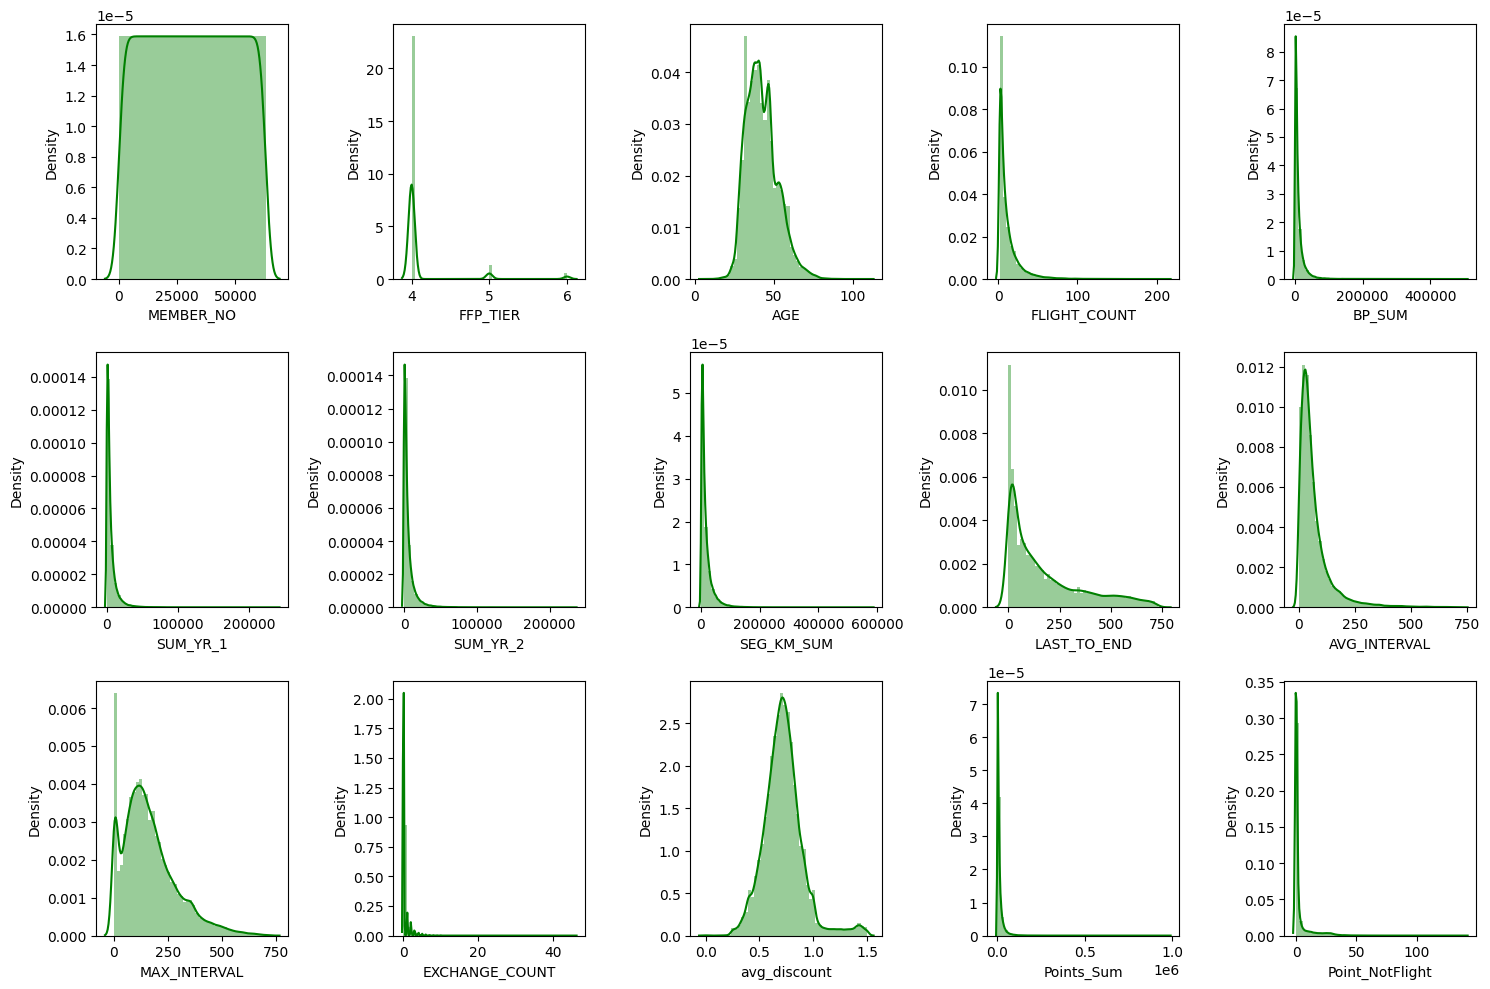

In [ ]:
plt.figure(figsize=(15, 10))
for i in range(0, len(nums)):
    plt.subplot(3, 5, i+1)
    sns.distplot(x=df[nums[i]], color='green')
    plt.xlabel(nums[i])
    plt.tight_layout()

In [ ]:
df['FFP_TIER'].value_counts()

4    58066
5     3409
6     1513
Name: FFP_TIER, dtype: int64

In [ ]:
df[cats].describe()

,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,LOAD_TIME,LAST_FLIGHT_DATE
count,62988,62988,62985,60719,59740,62962,62988,62988
unique,3068,3406,2,3234,1165,118,1,731
top,1/13/2011,2/16/2013,Male,guangzhou,guangdong,CN,3/31/2014,3/31/2014
freq,184,96,48134,9386,17509,57748,62988,959


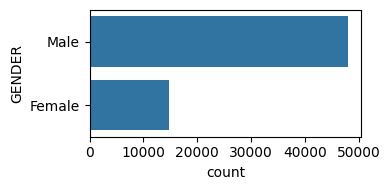

In [ ]:
plt.figure(figsize=(4, 2))
sns.countplot(y = df["GENDER"], orient='v')
plt.tight_layout()

In [ ]:
df["LOAD_TIME"] = pd.to_datetime(df["LOAD_TIME"])
df["LOAD_TIME"] = df["LOAD_TIME"].values.astype('datetime64[ns]')
df["FFP_DATE"] = pd.to_datetime(df["FFP_DATE"])
df["FFP_DATE"] = df["FFP_DATE"].values.astype('datetime64[ns]')
df["FIRST_FLIGHT_DATE"] = pd.to_datetime(df["FIRST_FLIGHT_DATE"])
df["FIRST_FLIGHT_DATE"] = df["FIRST_FLIGHT_DATE"].values.astype('datetime64[ns]')
df["LAST_FLIGHT_DATE"] = pd.to_datetime(df["LAST_FLIGHT_DATE"],errors='coerce')
df["LAST_FLIGHT_DATE"] = df["LAST_FLIGHT_DATE"].values.astype('datetime64[ns]')


In [ ]:
df.isna().sum()

MEMBER_NO               0
FFP_DATE                0
FIRST_FLIGHT_DATE       0
GENDER                  3
FFP_TIER                0
WORK_CITY            2269
WORK_PROVINCE        3248
WORK_COUNTRY           26
AGE                     0
LOAD_TIME               0
FLIGHT_COUNT            0
BP_SUM                  0
SUM_YR_1                0
SUM_YR_2                0
SEG_KM_SUM              0
LAST_FLIGHT_DATE      421
LAST_TO_END             0
AVG_INTERVAL            0
MAX_INTERVAL            0
EXCHANGE_COUNT          0
avg_discount            0
Points_Sum              0
Point_NotFlight         0
dtype: int64

In [ ]:
#membuat df tanpa kolom work_city, work_province, work_country, gender
df2 = df.drop(['GENDER','WORK_CITY','WORK_PROVINCE','WORK_COUNTRY'], axis = 1)

In [ ]:
df2=df2.dropna()
df2.isna().sum()

MEMBER_NO            0
FFP_DATE             0
FIRST_FLIGHT_DATE    0
FFP_TIER             0
AGE                  0
LOAD_TIME            0
FLIGHT_COUNT         0
BP_SUM               0
SUM_YR_1             0
SUM_YR_2             0
SEG_KM_SUM           0
LAST_FLIGHT_DATE     0
LAST_TO_END          0
AVG_INTERVAL         0
MAX_INTERVAL         0
EXCHANGE_COUNT       0
avg_discount         0
Points_Sum           0
Point_NotFlight      0
dtype: int64

EXPLORATORY DATA ANALYSIS

<Axes: >

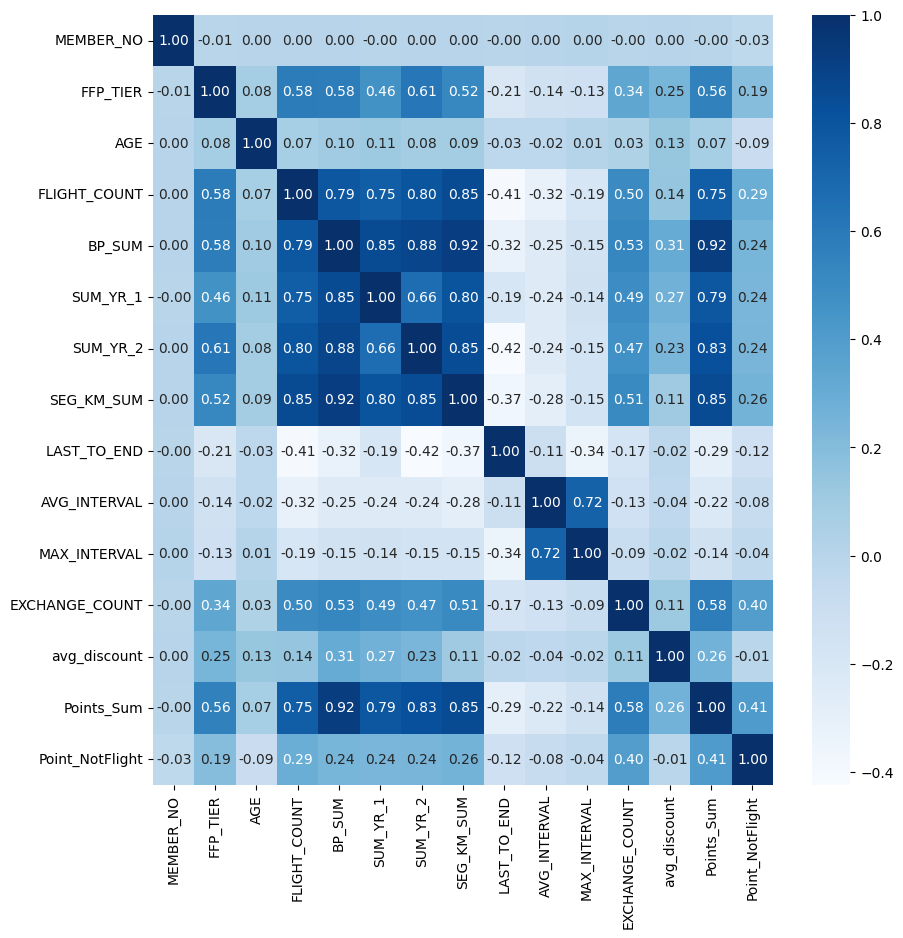

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(df2.corr(), cmap='Blues', annot=True, fmt='.2f')

Kolom-kolom berkorelasi kuat (di atas + 0.7):
- Points_Sum - BP_SUM
- Points_Sum - FLIGHT_COUNT
- Points_Sum - SUM_YR_1
- Points_Sum - SUM_YR_2
- Points_Sum - SEG_KM_SUM
- SEG_KM_SUM - FLIGHT_COUNT
- SEG_KM_SUM - BP_SUM
- SEG_KM_SUM - SUM_YR_1
- SEG_KM_SUM - SUM_YR_2
- BP_SUM -  FLIGHT_COUNT
- SUM_YR_2 - BP_SUM
- SUM_YR_2 - FLIGHT_COUNT
- SUM_YR_1 - BP_SUM
- SUM_YR_1 - FLIGHT_COUNT

## **FEATURE ENGINEERING**

## **FEATURE SELECTION**

Segmentasi akan dilakukan berdasarkan RFM: Recency, Frequency, dan Monetary.<br>
- Recency menunjukkan waktu interaksi terakhir pelanggan dengan produk.
- Frequency adalah tentang seberapa sering pelanggan melakukan pembelian. -
- Monetary value mengukur jumlah uang yang dihabiskan pelanggan untuk tiap transaksi pembelian.<br>

RFM adalah metode yang sering digunakan untuk menentukan apakah pelanggan tersebut berharga dengan cara melihat pembelian pelanggan yang paling akhir dilakukan, pelanggan yang selalu membeli, dan pelanggan yang mengeluarkan uang yang paling tinggi.

Feature yang akan digunakan: <br>
-Recency : ['LAST_TO_END'] <br>
-Frequency: ['FLIGHT_COUNT'], ['LAST_FLIGHT_DATE'], ['FIRST_FLIGHT_DATE'] <br>
-Monetary: ['SUM_YR_1'], ['SUM_YR_2'], ['avg_discount'] <br>

##**FEATURE EXTRACTION**

## **RECENCY**

In [ ]:
df2['recency'] = df2['LAST_TO_END']


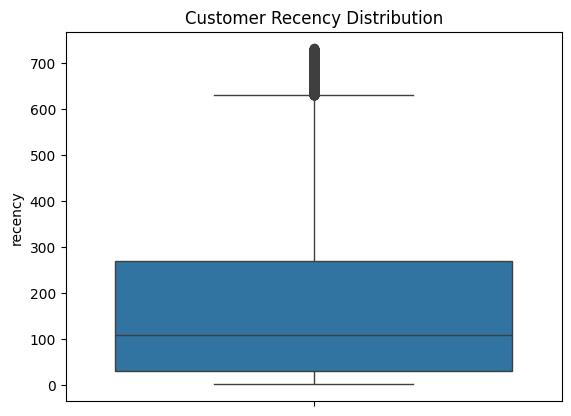

In [ ]:
sns.boxplot(df2['recency'])
plt.title('Customer Recency Distribution')
plt.show()


## **FREQUENCY**

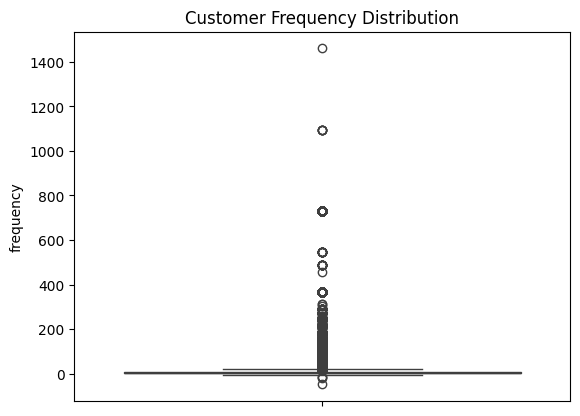

In [ ]:
df2['frequency']= df2['FLIGHT_COUNT']/ ((df2['LAST_FLIGHT_DATE'] - df2['FIRST_FLIGHT_DATE'])/np.timedelta64(1,'Y'))

sns.boxplot(df2['frequency'])
plt.title('Customer Frequency Distribution')
plt.show()

## **MONETARY**

Untuk menghitung monetary dari pelanggan, dilakukan kalkulasi total pengeluaran dari setiap pelanggan, termasuk fare revenue (pendapatan dari tiket), vote price income (pendapatan dari pemilihan kursi atau upgrade), dan discount (potongan harga yang diberikan).

Monetary = Fare revenue +  Vote price income - Discount

In [ ]:
df2['monetary'] = df2['SUM_YR_1'] + df2['SUM_YR_2'] - (df2['avg_discount']/100* df2['SUM_YR_1'])

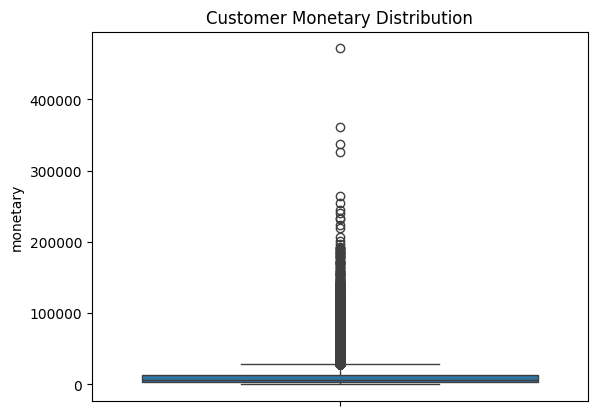

In [ ]:
sns.boxplot(df2['monetary'] )
plt.title('Customer Monetary Distribution')
plt.show()

In [ ]:
df_rfm = df2[['MEMBER_NO','recency','frequency','monetary']]
# Set CustomerID as index
df_rfm  = df_rfm.set_index('MEMBER_NO')
df_rfm.head()

,recency,frequency,monetary
MEMBER_NO,,,
54993,1,39.886076,471444.297509
28065,7,21.077473,336769.493629
55106,11,20.587782,326547.125014
21189,97,4.305780,240580.773261
39546,5,30.723221,254052.948526


## HANDLING OUTLIERS

In [ ]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df_rfm)}')

fil_ent = np.array([True] * len(df_rfm))
for col in df_rfm:
    Q1 = df_rfm[col].quantile(0.25)
    Q3 = df_rfm[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    fil_ent = ((df_rfm[col] >= low_limit) & (df_rfm[col] <= high_limit)) & fil_ent

df_rfm = df_rfm[fil_ent].reset_index()

print('Jumlah baris setelah memfilter outlier', len(df_rfm))

Jumlah baris sebelum memfilter outlier: 62567
Jumlah baris setelah memfilter outlier 50841


## STANDARDIZATION

In [ ]:
df_rfm_scaled = df_rfm.copy()
df_rfm_scaled  = df_rfm_scaled.set_index('MEMBER_NO')


In [ ]:
scaler = StandardScaler()

df_scaled = scaler.fit_transform(df_rfm_scaled)

df_scaled = pd.DataFrame(df_scaled, columns = df_rfm_scaled.columns, index = df_rfm_scaled.index)

df_scaled.head()

,recency,frequency,monetary
MEMBER_NO,,,
40664,-0.906894,3.149000,1.815893
8525,-0.735555,2.491633,0.108565
44810,-1.008427,0.778692,0.526229
14666,-0.120006,0.242648,3.072193
3697,-0.811705,-0.044917,3.008467


## **CLUSTERING**

<Axes: >

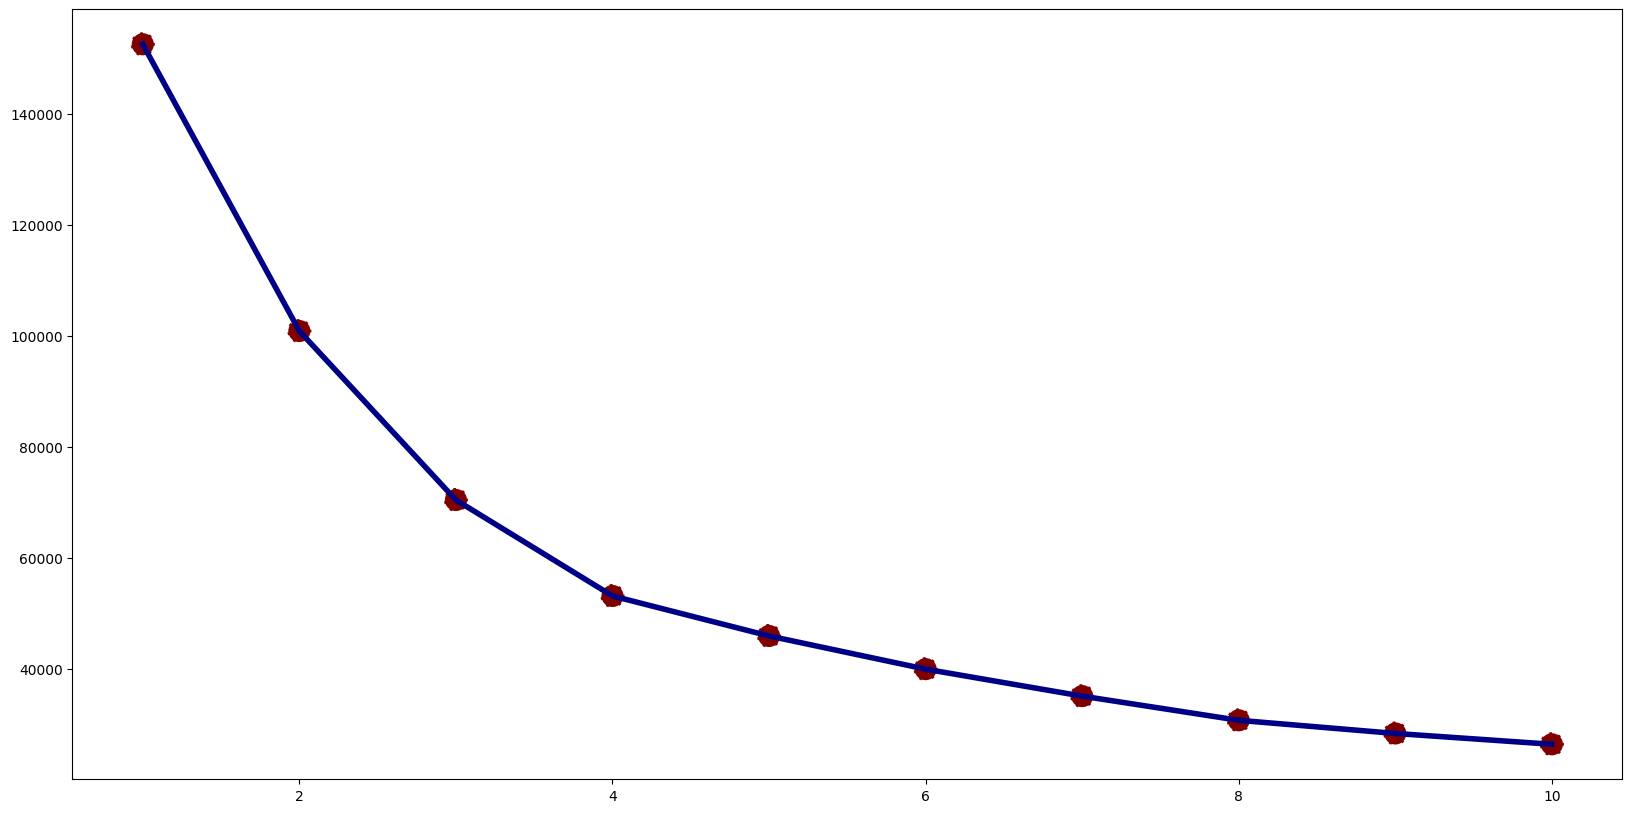

In [ ]:
from sklearn.cluster import KMeans
inertia = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)


plt.figure(figsize=(20, 10))
# plt.plot(inertia)

sns.lineplot(x=range(1, 11), y=inertia, color='#000087', linewidth = 4)
sns.scatterplot(x=range(1, 11), y=inertia, s=300, color='#800000',  linestyle='--')

In [ ]:
# Modeling
possible_k = [2, 3, 4, 5, 6, 7, 8, 9, 10]
silhouette = []

for k in possible_k:
    kmeans = KMeans(n_clusters = k, random_state = 0).fit(df_scaled)

    silhouette.append(silhouette_score(X = df_scaled, labels = kmeans.labels_))

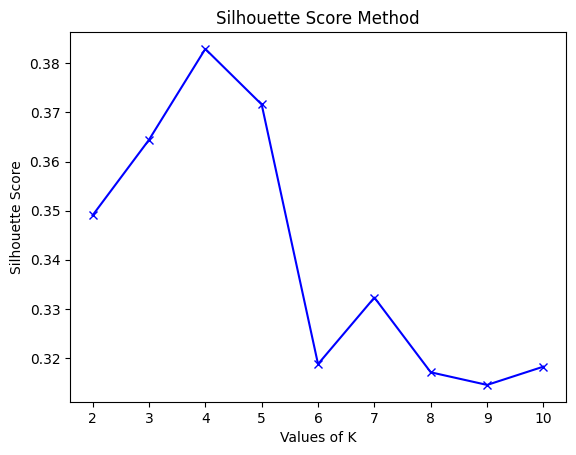

In [ ]:
# Plot the score
plt.plot(possible_k, silhouette, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Method')
plt.show()

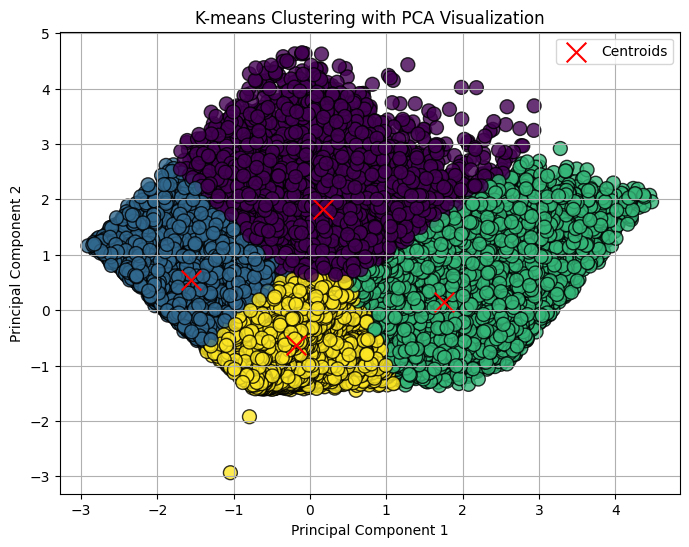

In [ ]:
from sklearn.decomposition import PCA
# Apply PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_scaled)

# Create DataFrame from principal components
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Perform K-means clustering
kmeans = KMeans(n_clusters=4)
kmeans.fit(principal_df)

# Visualize the clusters
plt.figure(figsize=(8, 6))

# Plot data points
plt.scatter(principal_df['PC1'], principal_df['PC2'], c=kmeans.labels_, cmap='viridis', edgecolor='k', s=100, alpha=0.8)

# Plot cluster centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', s=200, label='Centroids')

plt.title('K-means Clustering with PCA Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 4, random_state = 0).fit(df_scaled)

df_result_kmeans = df_rfm.copy()
df_result_kmeans['cluster'] = kmeans.labels_

In [ ]:
df_result_kmeans.head()

,MEMBER_NO,recency,frequency,monetary,cluster
0,40664,19,17.087368,19186.767745,3
1,8525,46,14.445367,8405.518522,3
2,44810,3,7.560947,11042.937408,1
3,14666,143,5.406550,27119.919444,1
4,3697,34,4.250808,26717.508417,1


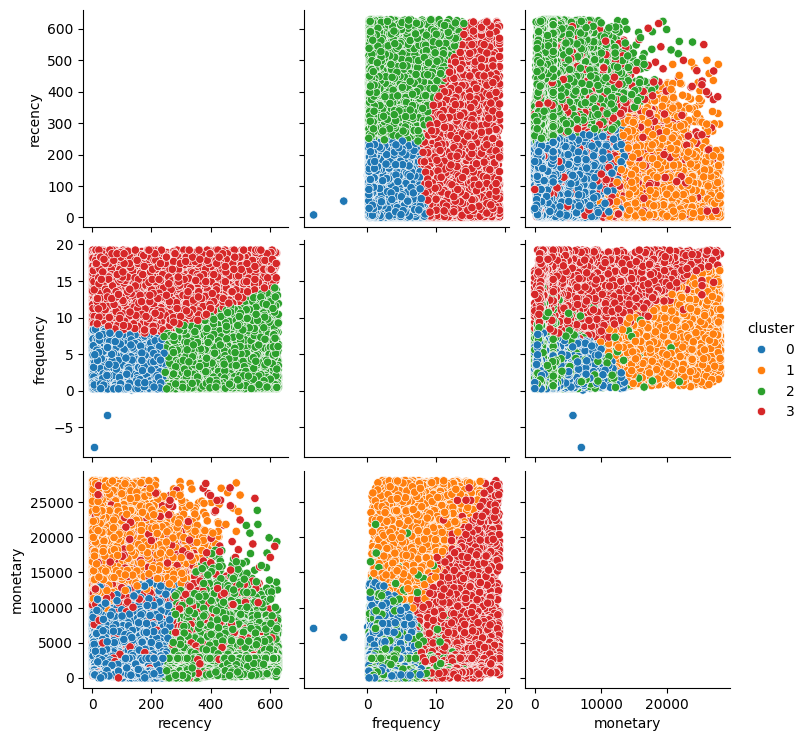

In [ ]:
df_result_kmeans = df_result_kmeans.set_index('MEMBER_NO')
sns.pairplot(data = df_result_kmeans, hue = 'cluster', diag_kind = 'None', palette = 'tab10')

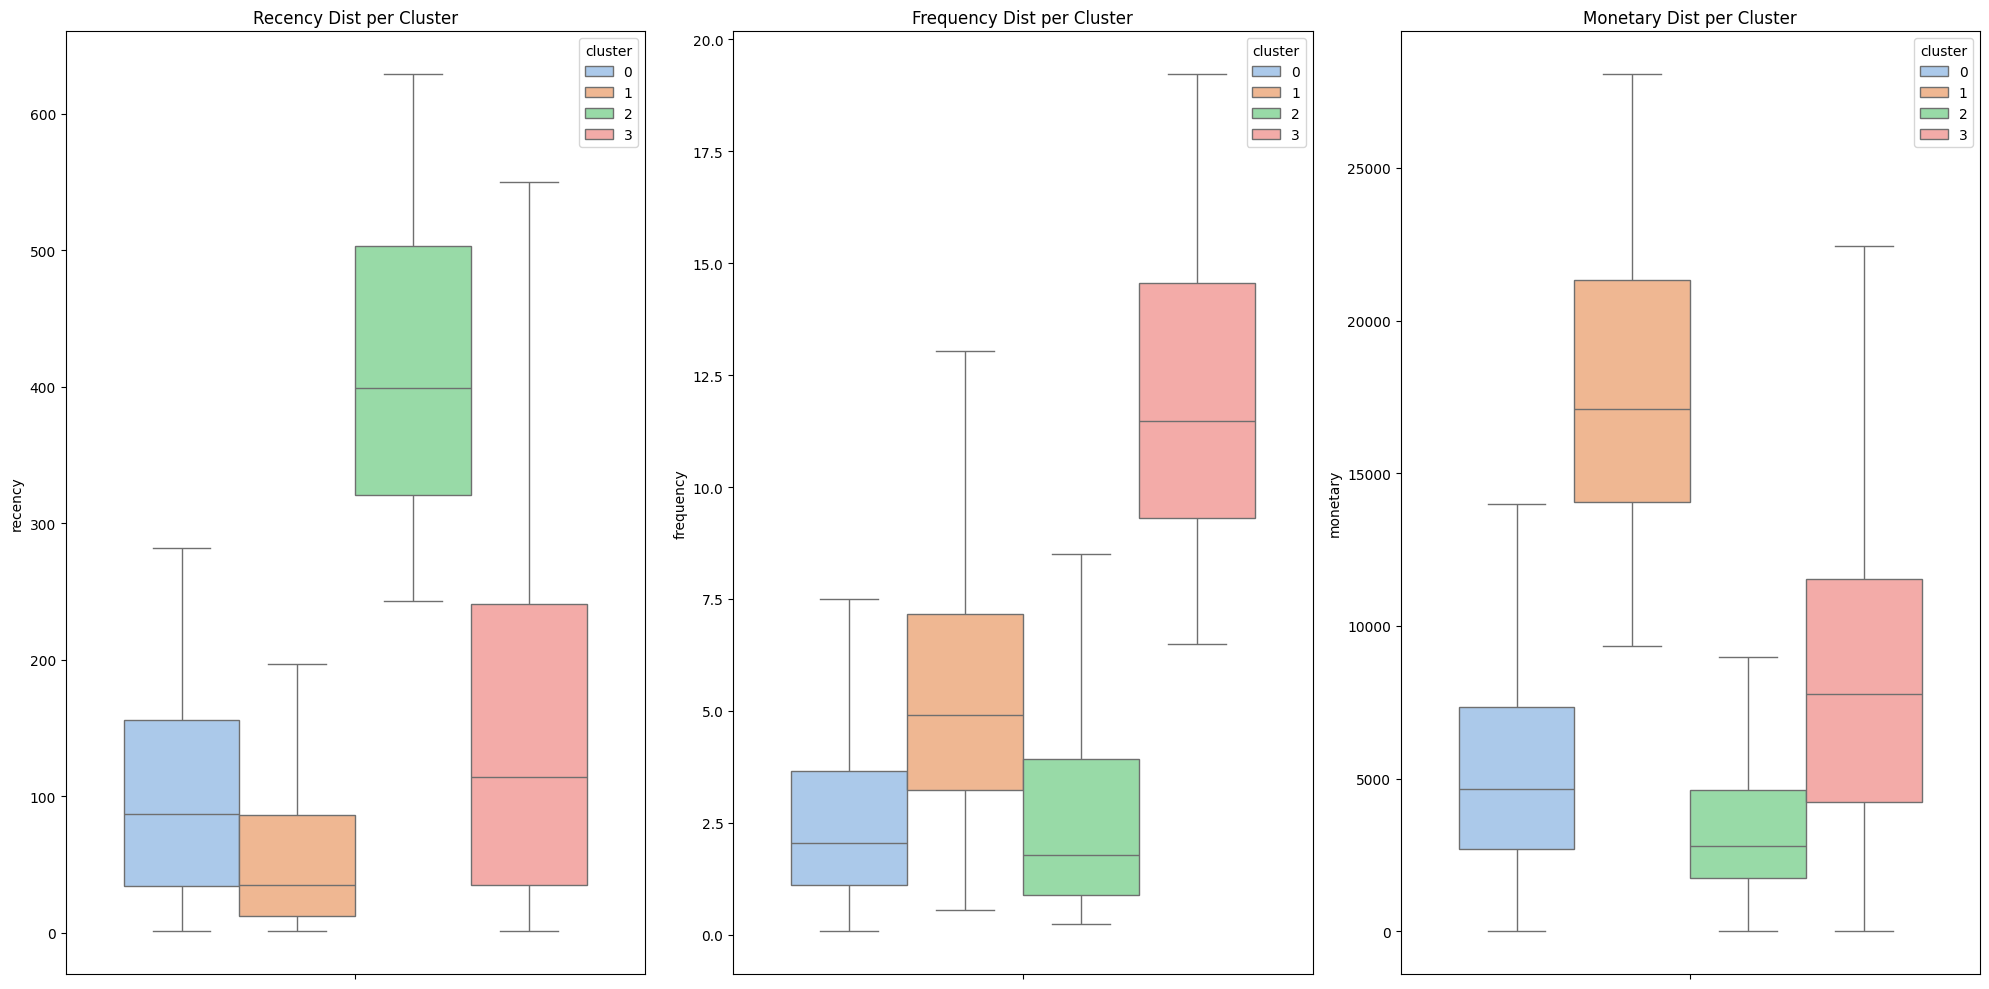

In [ ]:
#boxplot recency untuk tiap cluster
fig, ax = plt.subplots(1,3, figsize=(20,10))
sns.boxplot(data=df_result_kmeans, y='recency', hue = 'cluster', showfliers= False, ax=ax[0], palette ='pastel')
sns.boxplot(data=df_result_kmeans, y='frequency', hue = 'cluster', showfliers= False, ax=ax[1], palette ='pastel')
sns.boxplot(data=df_result_kmeans, y='monetary', hue = 'cluster', showfliers= False, ax=ax[2], palette ='pastel')
ax[0].set_title('Recency Dist per Cluster')
ax[1].set_title('Frequency Dist per Cluster')
ax[2].set_title('Monetary Dist per Cluster')
plt.tight_layout()
plt.show()

In [ ]:
df_result= df_result_kmeans.reset_index()

In [ ]:
df_new = df.merge(df_result, on = 'MEMBER_NO')

In [ ]:
df_new.head()

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight,index,recency,frequency,monetary,cluster
0,40664,2010-06-14,2010-06-14,Male,5,shanghai,shanghai,CN,61.0,2014-03-31,...,57,3,1.464382,92831,12,0,19,17.087368,19186.767745,3
1,8525,2006-07-31,2006-07-31,Female,4,shanghai,shanghai,CN,43.0,2014-03-31,...,43,5,0.610476,83170,13,1,46,14.445367,8405.518522,3
2,44810,2006-01-15,2006-01-15,Male,5,shanghai,shanghai,CN,54.0,2014-03-31,...,32,2,0.810345,82506,7,2,3,7.560947,11042.937408,1
3,14666,2012-01-28,2012-03-12,Male,4,ALHAMBRA,CALIFORNIA,US,32.0,2014-03-31,...,266,0,0.705556,55828,0,3,143,5.406550,27119.919444,1
4,3697,2011-02-06,2011-02-06,Male,4,SAN GABRIEL,CA,US,37.0,2014-03-31,...,161,2,0.623107,61080,2,4,34,4.250808,26717.508417,1


In [ ]:
df_new[df_new['cluster']==0].describe()

,MEMBER_NO,FFP_TIER,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight,index,recency,frequency,monetary,cluster
count,24306.000000,24306.000000,24306.000000,24306.000000,24306.000000,24306.000000,24306.000000,24306.000000,24306.000000,24306.000000,24306.000000,24306.000000,24306.000000,24306.000000,24306.000000,24306.000000,24306.000000,24306.000000,24306.000000,24306.0
mean,31466.588456,4.021929,42.445692,6.649922,5206.316506,2218.414630,2965.240352,9347.493417,99.120752,109.743117,244.916482,0.135769,0.697037,6186.800667,2.177652,29591.113100,99.120752,2.568863,5167.724979,0.0
std,18098.163350,0.184049,9.802528,4.044019,3646.648346,2174.323633,2100.412152,6108.024979,72.616090,96.834445,133.418659,0.580133,0.170540,8480.666852,6.512681,11536.493553,72.616090,1.832868,3001.403139,0.0
min,1.000000,4.000000,6.000000,2.000000,0.000000,0.000000,0.000000,368.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,88.000000,1.000000,-7.791840,0.000000,0.0
25%,15876.250000,4.000000,35.000000,4.000000,2474.000000,440.250000,1350.000000,4792.000000,34.000000,55.000000,153.000000,0.000000,0.588418,2709.000000,0.000000,20298.500000,34.000000,1.104286,2698.736335,0.0
50%,31287.500000,4.000000,41.000000,6.000000,4445.000000,1644.000000,2506.000000,8063.500000,87.000000,80.750000,224.000000,0.000000,0.690791,4917.500000,0.000000,29312.000000,87.000000,2.051924,4661.144673,0.0
75%,47267.500000,4.000000,48.000000,9.000000,7185.750000,3440.000000,4106.000000,12544.000000,156.000000,129.000000,327.000000,0.000000,0.791039,8043.750000,1.000000,38984.750000,156.000000,3.664640,7343.597864,0.0
max,62987.000000,6.000000,92.000000,42.000000,43654.000000,12704.000000,13500.000000,61160.000000,282.000000,728.000000,728.000000,22.000000,1.492178,985572.000000,111.000000,50840.000000,282.000000,8.494012,13999.280000,0.0


In [ ]:
df_new[df_new['cluster']==1].describe()

,MEMBER_NO,FFP_TIER,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight,index,recency,frequency,monetary,cluster
count,9639.000000,9639.000000,9639.000000,9639.000000,9639.000000,9639.000000,9639.000000,9639.000000,9639.000000,9639.000000,9639.000000,9639.000000,9639.000000,9639.000000,9639.000000,9639.000000,9639.000000,9639.000000,9639.000000,9639.0
mean,31548.628696,4.118581,44.045129,19.377529,17794.802469,8784.348169,9175.558772,28679.518830,60.536051,38.431272,164.060172,0.561158,0.758785,19733.249196,3.607117,6390.075423,60.536051,5.474618,17892.691505,1.0
std,18313.226784,0.386998,9.255551,7.807839,6715.990647,4461.957287,4431.106539,11332.548833,67.853836,19.010469,74.332782,1.158425,0.162840,9660.212194,8.100781,4462.300561,67.853836,2.895797,4589.396392,0.0
min,2.000000,4.000000,13.000000,2.000000,413.000000,0.000000,0.000000,5076.000000,1.000000,6.473684,25.000000,0.000000,0.379784,413.000000,0.000000,2.000000,1.000000,0.543516,9332.484859,1.0
25%,15310.000000,4.000000,37.000000,14.000000,13124.000000,5688.000000,6047.000000,20821.000000,12.000000,26.804762,112.000000,0.000000,0.663890,13806.500000,0.000000,2819.500000,12.000000,3.228768,14054.094693,1.0
50%,31293.000000,4.000000,43.000000,18.000000,16660.000000,8477.000000,8730.000000,26686.000000,35.000000,34.550000,148.000000,0.000000,0.732927,17827.000000,1.000000,5793.000000,35.000000,4.902584,17108.989036,1.0
75%,47724.000000,4.000000,49.000000,24.000000,21359.500000,11425.500000,11852.000000,34334.500000,86.000000,45.083333,197.000000,1.000000,0.811709,23253.500000,2.000000,9255.500000,86.000000,7.152560,21337.590243,1.0
max,62988.000000,6.000000,89.000000,77.000000,77127.000000,27996.000000,28040.000000,123460.000000,500.000000,296.500000,583.000000,20.000000,1.500000,216872.000000,104.000000,35302.000000,500.000000,17.255551,28067.247795,1.0


In [ ]:
df_new[df_new['cluster']==2].describe()

,MEMBER_NO,FFP_TIER,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight,index,recency,frequency,monetary,cluster
count,10089.000000,10089.000000,10089.000000,10089.000000,10089.000000,10089.000000,10089.000000,10089.000000,10089.000000,10089.000000,10089.000000,10089.000000,10089.000000,10089.000000,10089.000000,10089.000000,10089.000000,10089.000000,10089.000000,10089.0
mean,31119.816434,4.010110,42.638220,4.234513,3617.349291,3088.580632,543.089008,6323.065220,414.129051,76.807833,134.722569,0.081078,0.715476,4287.738527,1.521955,36074.182674,414.129051,2.754214,3608.101947,2.0
std,18145.404359,0.131698,10.148889,2.706007,3248.547262,2696.498814,1001.947425,5048.836094,106.953295,71.400504,95.249598,0.498180,0.198685,6874.990416,5.296740,10986.538601,106.953295,2.520361,2727.663147,0.0
min,7.000000,4.000000,9.000000,2.000000,0.000000,0.000000,0.000000,368.000000,243.000000,0.000000,0.000000,0.000000,0.137586,0.000000,0.000000,128.000000,243.000000,0.232639,0.000000,2.0
25%,14765.000000,4.000000,35.000000,2.000000,1537.000000,1275.000000,0.000000,3023.000000,321.000000,29.666667,63.000000,0.000000,0.587339,1642.000000,0.000000,28884.000000,321.000000,0.874483,1748.317858,2.0
50%,31069.000000,4.000000,41.000000,3.000000,2684.000000,2420.000000,0.000000,4836.000000,399.000000,59.333333,124.000000,0.000000,0.711078,2915.000000,0.000000,38367.000000,399.000000,1.773022,2786.000000,2.0
75%,46778.000000,4.000000,48.000000,5.000000,4674.000000,4063.000000,800.000000,8013.000000,503.000000,100.000000,194.000000,0.000000,0.829359,5197.000000,0.000000,45162.000000,503.000000,3.933381,4641.830564,2.0
max,62977.000000,6.000000,110.000000,25.000000,45863.000000,24113.000000,12800.000000,62550.000000,629.000000,469.000000,469.000000,27.000000,1.500000,502044.000000,50.000000,50837.000000,629.000000,14.047788,23819.687678,2.0


In [ ]:
df_new[df_new['cluster']==3].describe()

,MEMBER_NO,FFP_TIER,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight,index,recency,frequency,monetary,cluster
count,6807.000000,6807.000000,6807.000000,6807.000000,6807.000000,6807.000000,6807.000000,6807.000000,6807.000000,6807.000000,6807.000000,6807.000000,6807.000000,6807.000000,6807.000000,6807.000000,6807.000000,6807.000000,6807.000000,6807.0
mean,32229.971500,4.046276,39.914941,11.465256,8573.369913,3638.041911,4911.105480,14989.288673,155.843103,37.733331,121.666226,0.075657,0.700799,9514.491994,2.025856,21682.130013,155.843103,12.090129,8522.708174,3.0
std,18214.840493,0.252645,9.451173,7.814026,6254.357086,3849.362806,4069.573779,10127.715033,142.202056,12.594467,56.924095,0.466011,0.154195,8104.229609,5.781701,13015.651655,142.202056,3.257386,5414.320237,0.0
min,9.000000,4.000000,15.000000,2.000000,0.000000,0.000000,0.000000,552.000000,1.000000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.487433,0.000000,3.0
25%,16165.500000,4.000000,32.000000,5.000000,3938.000000,571.500000,1764.000000,7548.500000,35.000000,28.000000,81.000000,0.000000,0.607987,4319.500000,0.000000,11580.500000,35.000000,9.305541,4233.497845,3.0
50%,33409.000000,4.000000,38.000000,10.000000,7428.000000,2600.000000,4124.000000,13165.000000,114.000000,36.333333,111.000000,0.000000,0.698126,7971.000000,0.000000,19275.000000,114.000000,11.481100,7757.309849,3.0
75%,47516.000000,4.000000,46.000000,15.000000,11563.500000,5488.500000,7177.000000,20033.500000,241.000000,45.750000,149.000000,0.000000,0.783428,12435.000000,1.000000,30884.500000,241.000000,14.561972,11534.836359,3.0
max,62935.000000,6.000000,84.000000,109.000000,82657.000000,27865.000000,26093.000000,144111.000000,624.000000,94.000000,455.000000,14.000000,1.500000,235494.000000,82.000000,50839.000000,624.000000,19.223289,28035.284454,3.0


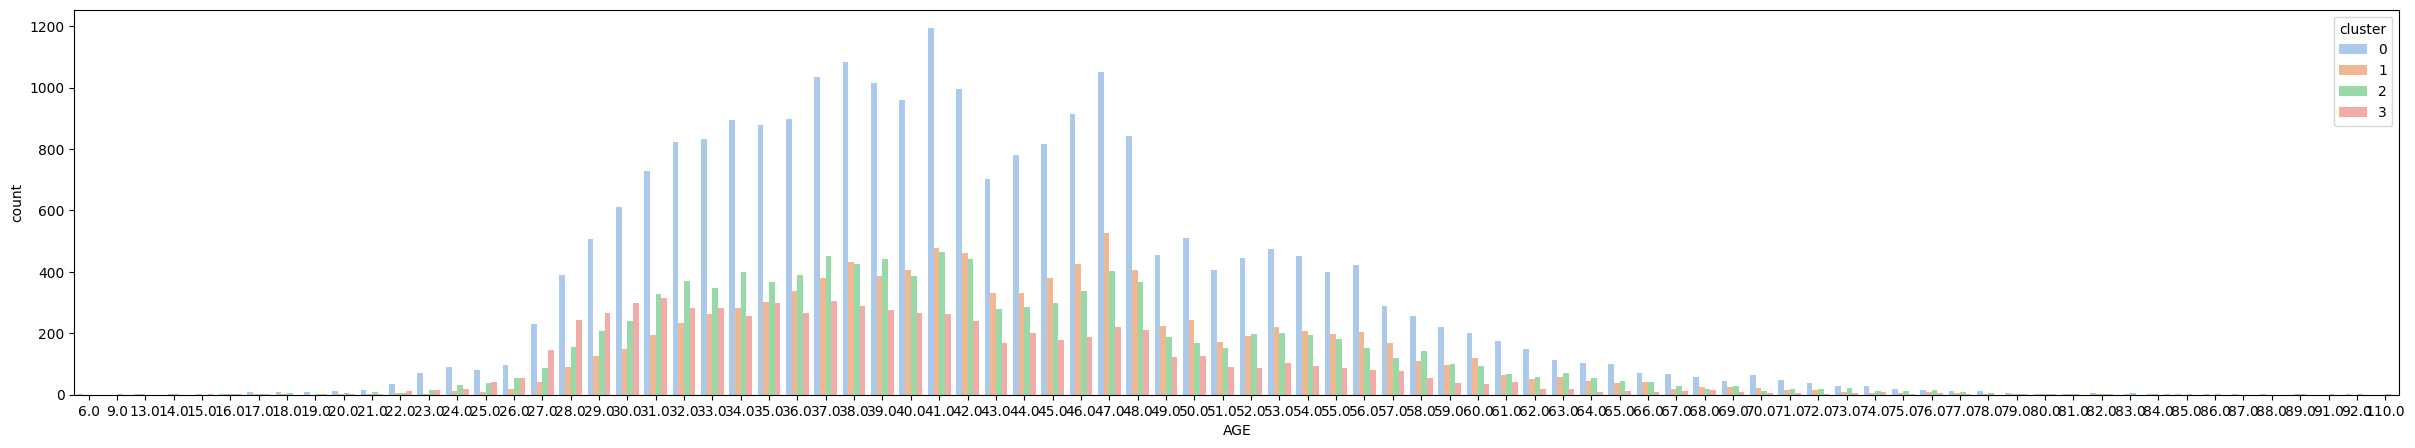

In [ ]:
plt.figure(figsize=(30,5))
ax = sns.countplot(x="AGE", data=df_new, hue='cluster', palette ='pastel')

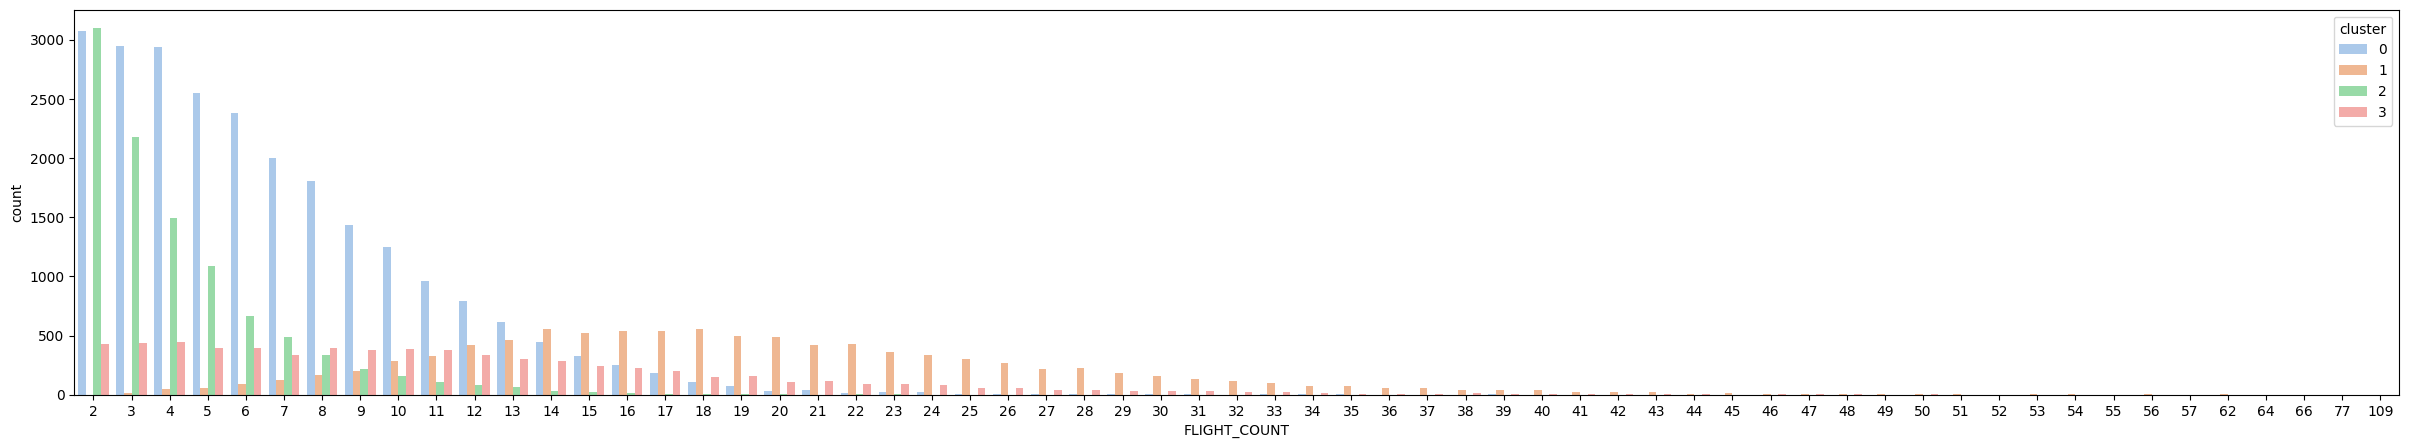

In [ ]:
plt.figure(figsize=(30,5))
ax = sns.countplot(x="FLIGHT_COUNT", data=df_new, hue='cluster',palette ='pastel')

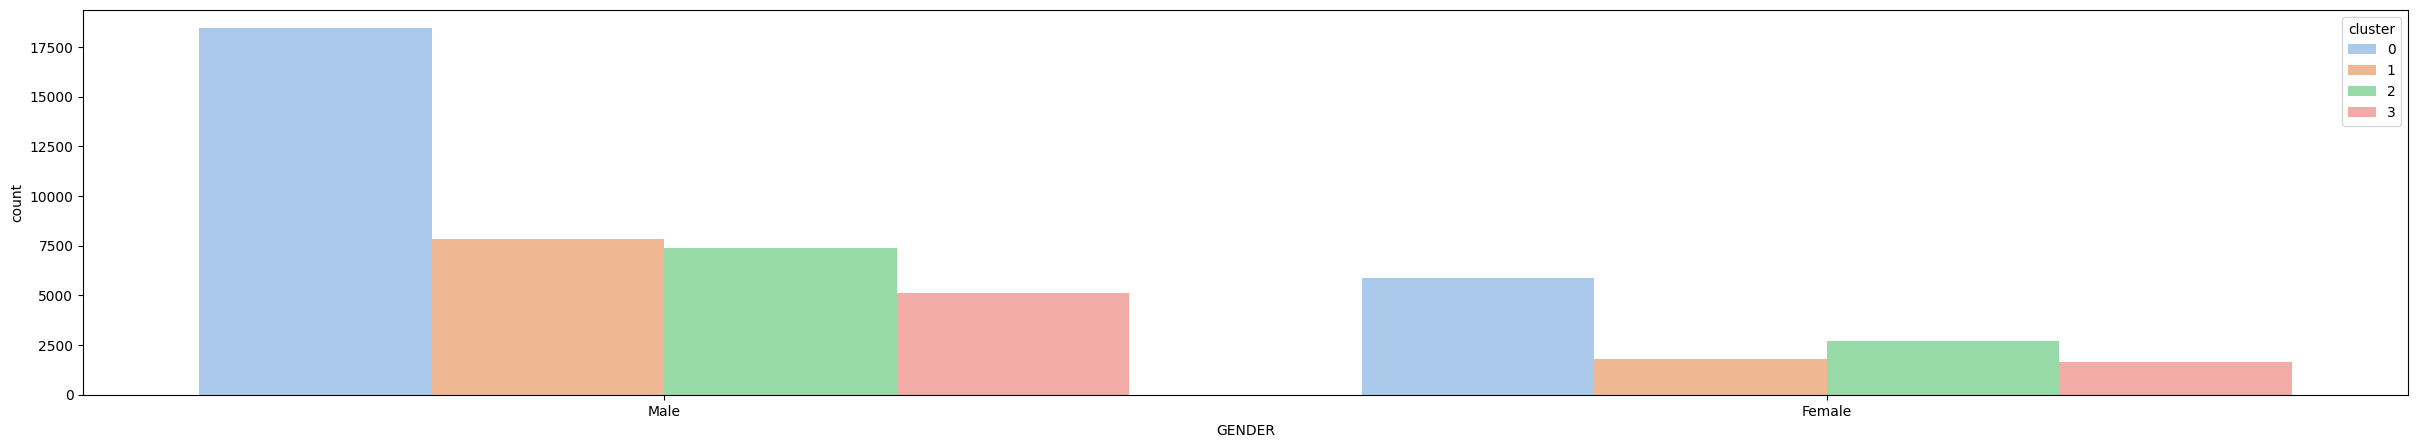

In [ ]:
plt.figure(figsize=(30,5))
ax = sns.countplot(x="GENDER", data=df_new, hue='cluster', palette ='pastel')

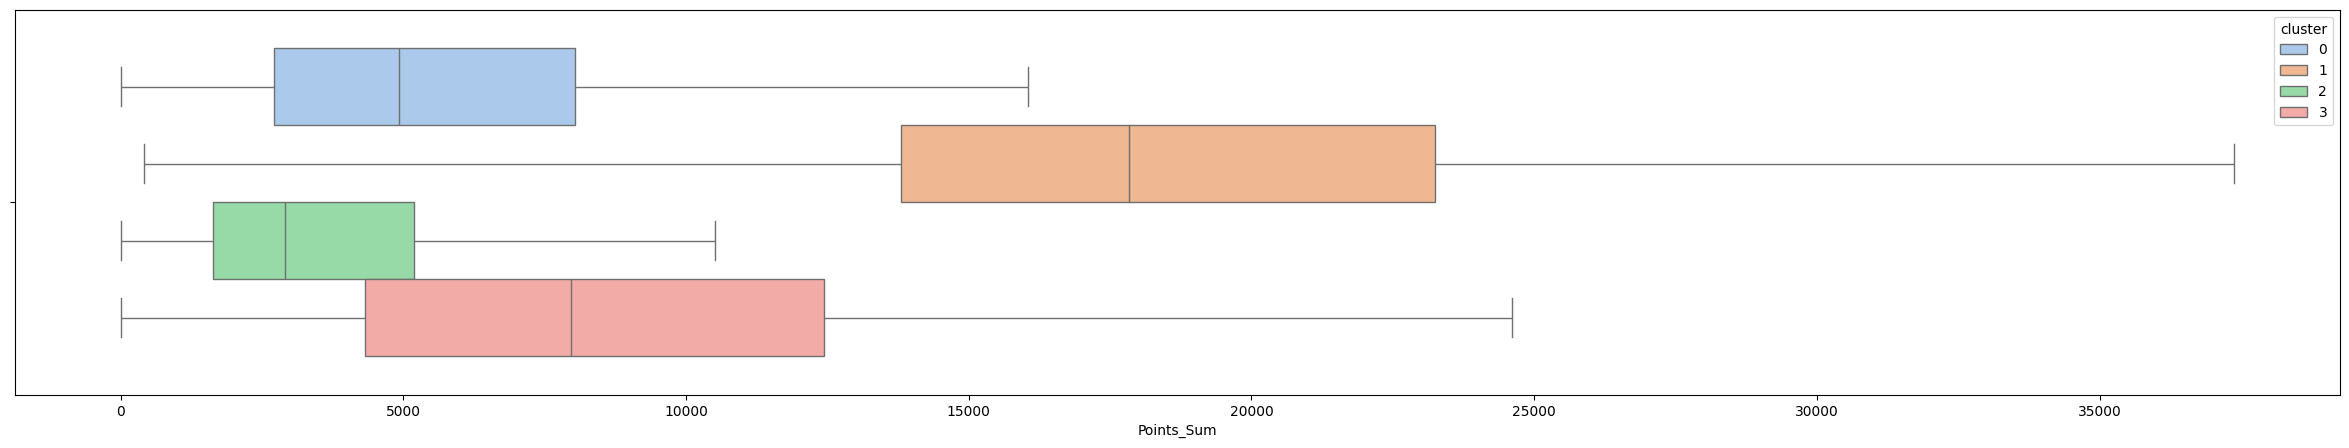

In [ ]:
plt.figure(figsize=(30,5))
ax = sns.boxplot(x="Points_Sum", data=df_new, showfliers= False, hue='cluster', palette ='pastel')

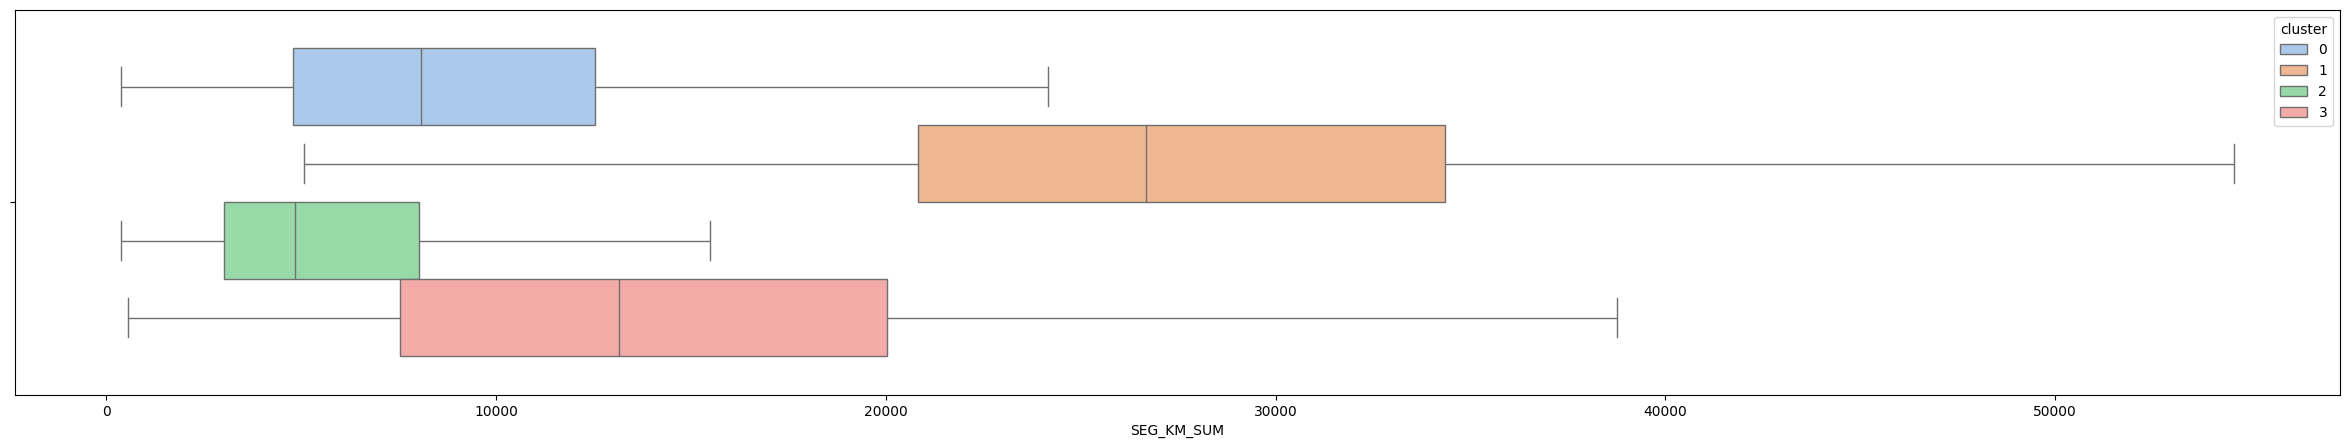

In [ ]:
plt.figure(figsize=(30,5))
ax = sns.boxplot(x="SEG_KM_SUM", data=df_new, showfliers= False, hue='cluster',palette ='pastel')

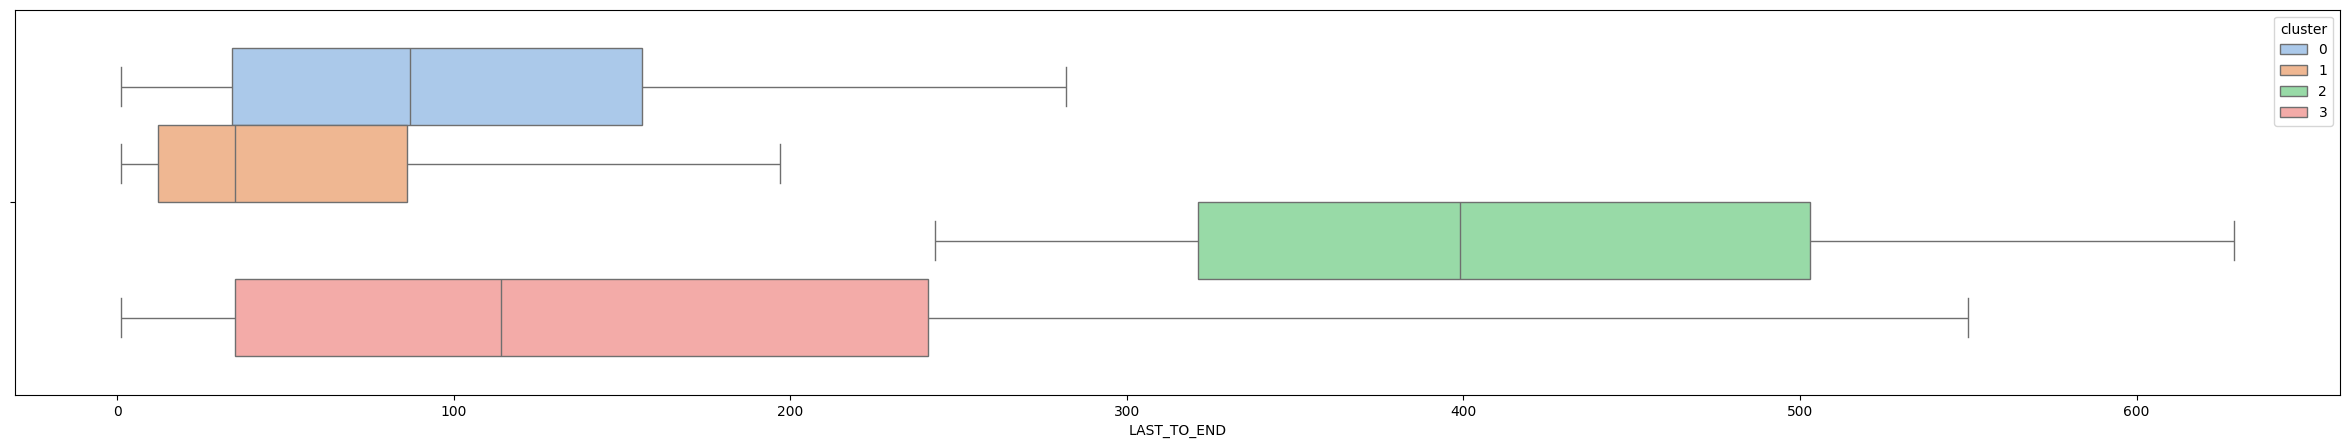

In [ ]:
plt.figure(figsize=(30,5))
ax = sns.boxplot(x="LAST_TO_END", data=df_new, showfliers= False, hue='cluster', palette ='pastel')

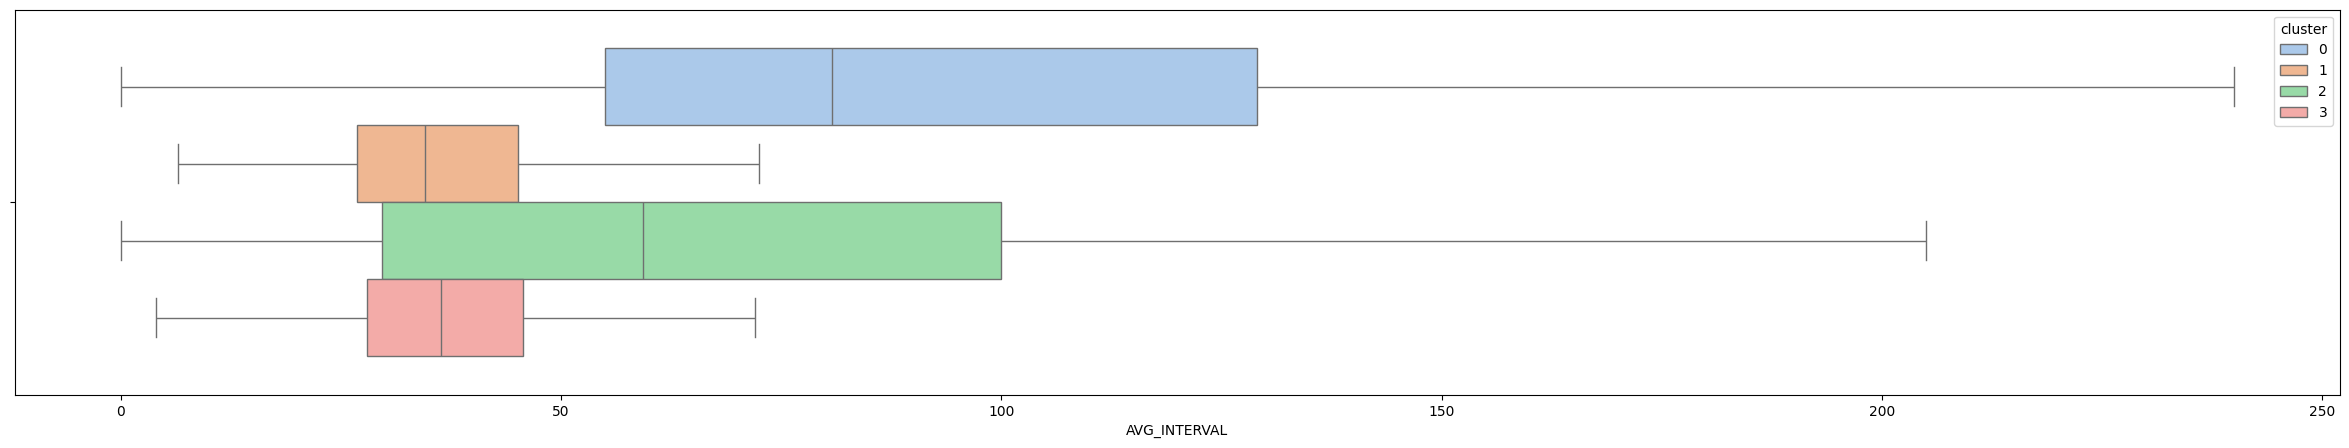

In [ ]:
plt.figure(figsize=(30,5))
ax = sns.boxplot(x="AVG_INTERVAL", data=df_new, showfliers= False, hue='cluster', palette ='pastel')

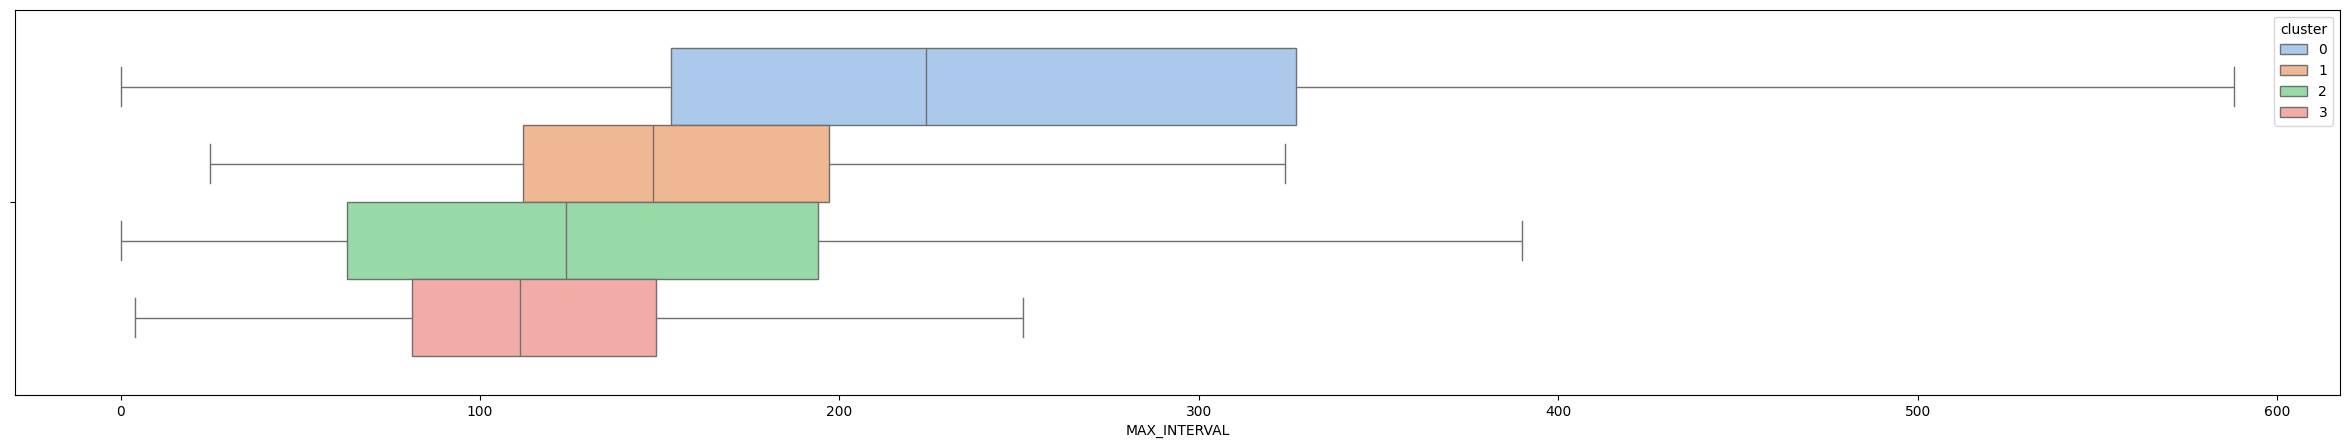

In [ ]:
plt.figure(figsize=(30,5))
ax = sns.boxplot(x="MAX_INTERVAL", data=df_new, showfliers= False, hue='cluster',palette ='pastel')